# Regularization

Get the necessary files for the next session from https://www.kaggle.com/datasets/zalando-research/fashionmnist


## Preparing the data (Fashion MNIST)

In [1]:
#!pip install scikit-learn
#!pip install tensorflow==2.10
import pandas as pd
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
print("Tesorflow version {tf.__version__}")

#read data with pandas
dataTrain = pd.read_csv('data/fashion-mnist_train.csv')
dataTest = pd.read_csv('data/fashion-mnist_test.csv')
#convert to numpy and initialize variables for training
X_train, y_train = dataTrain.iloc[:, 1:].to_numpy(), dataTrain.iloc[:, 0].to_numpy()
X_test, y_test = dataTest.iloc[:, 1:].to_numpy(), dataTest.iloc[:, 0].to_numpy()

#Define Classnames
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(tf.config.list_physical_devices('GPU'))

# prepare ground truth as one-hot encoded values
y_one_hot = tf.one_hot(y_train,len(class_names))
y_one_hot_test = tf.one_hot(y_test,len(class_names))

2.10.0


# Original Run / Reference Run

In [4]:
model = Sequential()
model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(len(class_names), activation="softmax"))
model.compile(optimizer='sgd', loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(
    X_train,
    y_one_hot,
    epochs=10,
    batch_size=100)

print("\nEvaluation on Test Data")
print(model.evaluate(X_test, y_one_hot_test))

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 1.1626 - accuracy: 0.6618
Epoch 2/10
600/600 [==============================] - 3s 6ms/step - loss: 0.7515 - accuracy: 0.7591
Epoch 3/10
600/600 [==============================] - 3s 6ms/step - loss: 0.6493 - accuracy: 0.7844
Epoch 4/10
600/600 [==============================] - 3s 6ms/step - loss: 0.5990 - accuracy: 0.7984
Epoch 5/10
600/600 [==============================] - 3s 6ms/step - loss: 0.5728 - accuracy: 0.8044
Epoch 6/10
600/600 [==============================] - 3s 6ms/step - loss: 0.5569 - accuracy: 0.8071
Epoch 7/10
600/600 [==============================] - 3s 6ms/step - loss: 0.5413 - accuracy: 0.8113
Epoch 8/10
600/600 [==============================] - 4s 6ms/step - loss: 0.5371 - accuracy: 0.8120
Epoch 9/10
600/600 [==============================] - 4s 7ms/step - loss: 0.5367 - accuracy: 0.8108
Epoch 10/10
600/600 [==============================] - 4s 6ms/step - loss: 0.5272 - accuracy: 0.8141

# Now make the model overfitting

Complex Model (more Layers, more neurons) are more likely to overfit. Less data is more likely to overfit. We raise the number of epochs to learn longer. The learning rate has to be adjusted in order to make the model learn effectively.

In [11]:
from tensorflow.keras.optimizers.experimental import SGD
model = Sequential([
      Dense(512, activation='relu'),
      Dense(512, activation='relu'),
      Dense(10, activation="softmax")
      ])
model.compile(optimizer=SGD(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])
model.fit(
    X_test,
    y_one_hot_test,
    epochs=30,
    batch_size=100)


Epoch 1/30
100/100 [==============================] - 2s 10ms/step - loss: 15.7190 - accuracy: 0.6505
Epoch 2/30
100/100 [==============================] - 1s 8ms/step - loss: 1.0978 - accuracy: 0.7544
Epoch 3/30
100/100 [==============================] - 1s 6ms/step - loss: 0.7653 - accuracy: 0.7932
Epoch 4/30
100/100 [==============================] - 1s 6ms/step - loss: 0.5907 - accuracy: 0.8179
Epoch 5/30
100/100 [==============================] - 1s 7ms/step - loss: 0.4921 - accuracy: 0.8413
Epoch 6/30
100/100 [==============================] - 1s 6ms/step - loss: 0.4172 - accuracy: 0.8548
Epoch 7/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3674 - accuracy: 0.8723
Epoch 8/30
100/100 [==============================] - 1s 7ms/step - loss: 0.3312 - accuracy: 0.8829
Epoch 9/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2998 - accuracy: 0.8924
Epoch 10/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2765 - accuracy: 0.90

In [12]:
print("Evaluation on Training Data")
print(model.evaluate(X_train[0:10000], y_one_hot[0:10000], batch_size=1000))

Evaluation on Training Data
10/10 [==============================] - 0s 25ms/step - loss: 0.9999 - accuracy: 0.8024
[0.9999175667762756, 0.8023999929428101]


# Dropout Layer - Instantiation and Effects

In [15]:
from tensorflow.keras.layers import Dropout 

dropout = Dropout(rate=0.2)
dropout

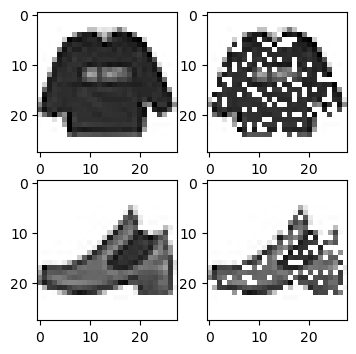

In [38]:
X_train_28x28 = X_train.reshape(-1,28,28).astype(float)[0:2]
modified = dropout(X_train_28x28, training=True)

fig, axs = plt.subplots(2, 2, figsize=(4, 4))

for index, img in enumerate(X_train_28x28):
    axs[index,0].imshow(img, cmap="gray_r")
    axs[index,1].imshow(modified[index], cmap="gray_r")


# Regularization with Dropout

In [17]:
from tensorflow.keras.optimizers.experimental import SGD
model = Sequential([
      Dropout(rate=0.2, input_shape=(784,)),
      Dense(512, activation='relu'),
      Dense(512, activation='relu'),
      Dense(10, activation="softmax")
      ])

model.compile(optimizer=SGD(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])

model.fit(
    X_test,
    y_one_hot_test,
    epochs=60,
    batch_size=100)

Epoch 1/60
100/100 [==============================] - 1s 5ms/step - loss: 28.0870 - accuracy: 0.5538
Epoch 2/60
100/100 [==============================] - 0s 4ms/step - loss: 2.2482 - accuracy: 0.6309
Epoch 3/60
100/100 [==============================] - 0s 4ms/step - loss: 1.6457 - accuracy: 0.6515
Epoch 4/60
100/100 [==============================] - 1s 6ms/step - loss: 1.3651 - accuracy: 0.6644
Epoch 5/60
100/100 [==============================] - 1s 6ms/step - loss: 1.1848 - accuracy: 0.6700
Epoch 6/60
100/100 [==============================] - 1s 6ms/step - loss: 1.0691 - accuracy: 0.6866
Epoch 7/60
100/100 [==============================] - 1s 7ms/step - loss: 1.0105 - accuracy: 0.6947
Epoch 8/60
100/100 [==============================] - 1s 6ms/step - loss: 0.9425 - accuracy: 0.6998
Epoch 9/60
100/100 [==============================] - 1s 6ms/step - loss: 0.8762 - accuracy: 0.7107
Epoch 10/60
100/100 [==============================] - 1s 6ms/step - loss: 0.8308 - accuracy: 0.716

In [18]:
print("Evaluation on Training Data")
print(model.evaluate(X_train[0:10000], y_one_hot[0:10000], batch_size=1000))

Evaluation on Training Data
10/10 [==============================] - 0s 24ms/step - loss: 0.4979 - accuracy: 0.8192
[0.4978620707988739, 0.8191999793052673]


# Regularization with Weight penalties

In [34]:
from tensorflow.keras.optimizers.experimental import SGD
from tensorflow.keras.regularizers import L2 
model = Sequential([
      Dense(512, activation='relu', kernel_regularizer=L2(0.2)),
      Dense(512, activation='relu', kernel_regularizer=L2(0.2)),
      Dense(10, activation="softmax")
      ])

model.compile(optimizer=SGD(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])

model.fit(
    X_test,
    y_one_hot_test,
    epochs=60,
    batch_size=100)

Epoch 1/60
100/100 [==============================] - 1s 5ms/step - loss: 260.0240 - accuracy: 0.5894
Epoch 2/60
100/100 [==============================] - 0s 5ms/step - loss: 203.8573 - accuracy: 0.7040
Epoch 3/60
100/100 [==============================] - 1s 5ms/step - loss: 187.9824 - accuracy: 0.7377
Epoch 4/60
100/100 [==============================] - 1s 7ms/step - loss: 173.4285 - accuracy: 0.7658
Epoch 5/60
100/100 [==============================] - 1s 7ms/step - loss: 160.0475 - accuracy: 0.7939
Epoch 6/60
100/100 [==============================] - 1s 7ms/step - loss: 147.7294 - accuracy: 0.8071
Epoch 7/60
100/100 [==============================] - 1s 7ms/step - loss: 136.3610 - accuracy: 0.8274
Epoch 8/60
100/100 [==============================] - 1s 7ms/step - loss: 125.8893 - accuracy: 0.8335
Epoch 9/60
100/100 [==============================] - 1s 7ms/step - loss: 116.2142 - accuracy: 0.8482
Epoch 10/60
100/100 [==============================] - 1s 7ms/step - loss: 107.292

In [33]:
print("Evaluation on Training Data")
print(model.evaluate(X_train[0:10000], y_one_hot[0:10000], batch_size=1000))

Evaluation on Training Data
10/10 [==============================] - 0s 24ms/step - loss: 0.8828 - accuracy: 0.8455
[0.8827620148658752, 0.8454999923706055]


# Now both 

In [37]:
from tensorflow.keras.optimizers.experimental import SGD
from tensorflow.keras.regularizers import L2 
model = Sequential([
      Dropout(rate=0.1, input_shape=(784,)),
      Dense(512, activation='relu', kernel_regularizer=L2(0.1)),
      Dense(512, activation='relu', kernel_regularizer=L2(0.1)),
      Dropout(rate=0.1, input_shape=(784,)),
      Dense(10, activation="softmax")
      ])

model.compile(optimizer=SGD(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])

model.fit(
    X_test,
    y_one_hot_test,
    epochs=60,
    batch_size=100)

print("Evaluation on Training Data")
print(model.evaluate(X_train[0:10000], y_one_hot[0:10000], batch_size=1000))

Epoch 1/60
100/100 [==============================] - 2s 12ms/step - loss: 130.3855 - accuracy: 0.5981
Epoch 2/60
100/100 [==============================] - 1s 8ms/step - loss: 108.5873 - accuracy: 0.6655
Epoch 3/60
100/100 [==============================] - 1s 8ms/step - loss: 103.8040 - accuracy: 0.6920
Epoch 4/60
100/100 [==============================] - 1s 8ms/step - loss: 99.5596 - accuracy: 0.6964
Epoch 5/60
100/100 [==============================] - 1s 8ms/step - loss: 95.5121 - accuracy: 0.7066
Epoch 6/60
100/100 [==============================] - 1s 8ms/step - loss: 91.6921 - accuracy: 0.7320
Epoch 7/60
100/100 [==============================] - 1s 7ms/step - loss: 88.0379 - accuracy: 0.7344
Epoch 8/60
100/100 [==============================] - 1s 8ms/step - loss: 84.5571 - accuracy: 0.7448
Epoch 9/60
100/100 [==============================] - 1s 8ms/step - loss: 81.1874 - accuracy: 0.7628
Epoch 10/60
100/100 [==============================] - 1s 8ms/step - loss: 77.9824 - ac